IMPORT MODULES

In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC

LODING THE DATASET

In [58]:
df=pd.read_csv("Iris.csv")

In [59]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

PREPROCESSING THE DATASET

In [64]:
#check null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

EXPLORATORY DATA ANALYSIS

<Axes: >

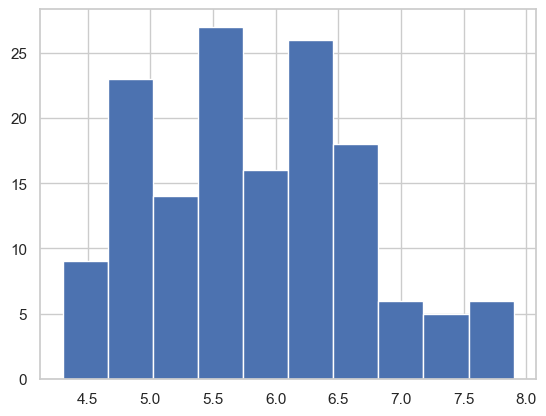

In [65]:
#histograms
df['SepalLengthCm'].hist()

<Axes: >

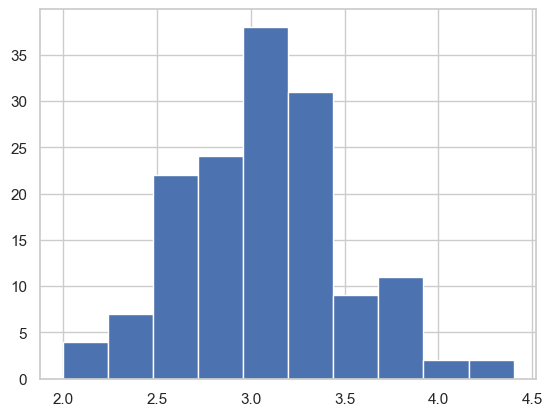

In [66]:
df['SepalWidthCm'].hist()

<Axes: >

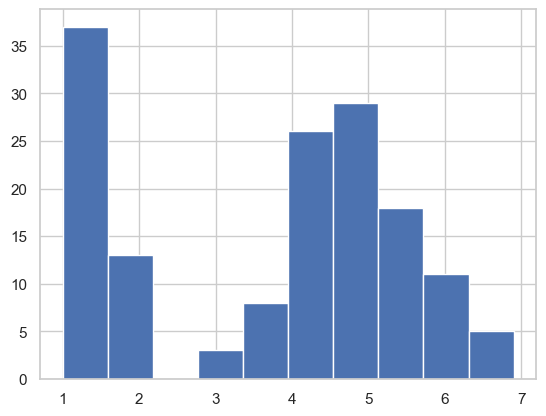

In [67]:
df['PetalLengthCm'].hist()

<Axes: >

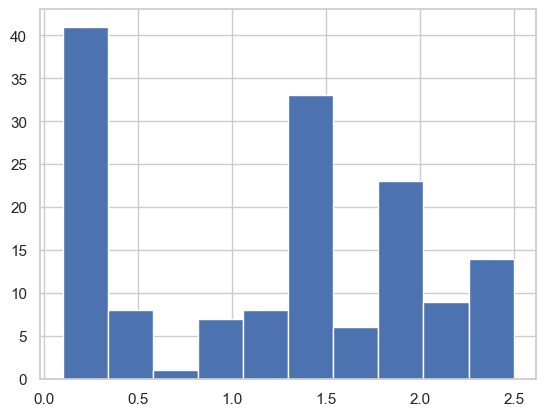

In [68]:
df['PetalWidthCm'].hist()

In [69]:
#scatterplot
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

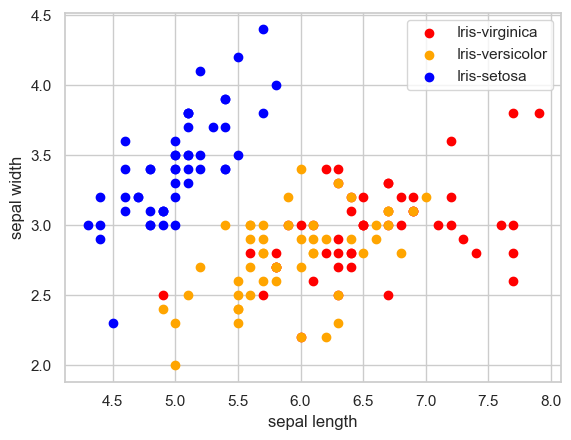

In [70]:
for i in range(3):
    x= df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.legend()

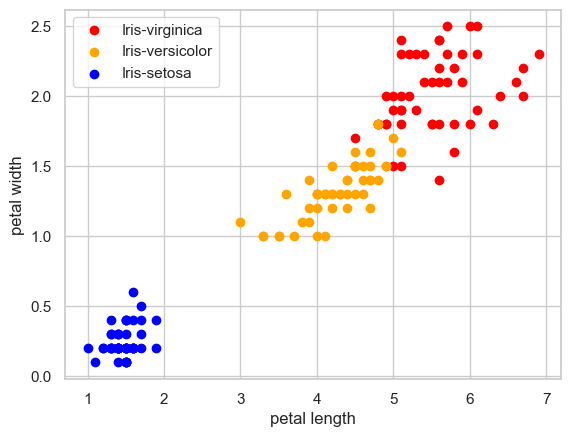

In [71]:
for i in range(3):
    x= df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.legend()

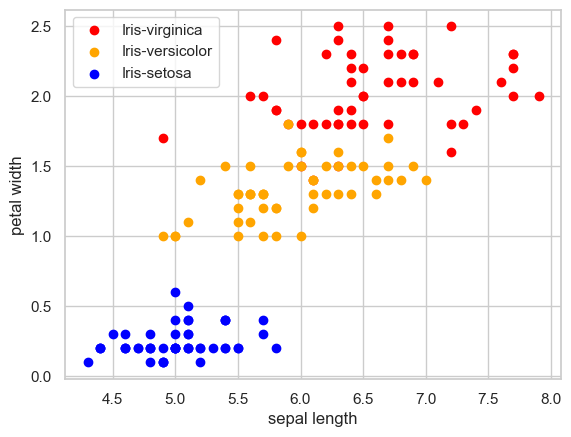

In [72]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalWidthCm'], c=colors[i],label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("petal width")
    plt.legend()

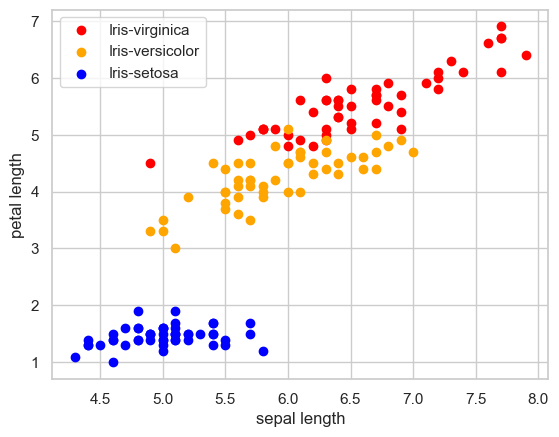

In [73]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c=colors[i],label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("petal length")
    plt.legend()

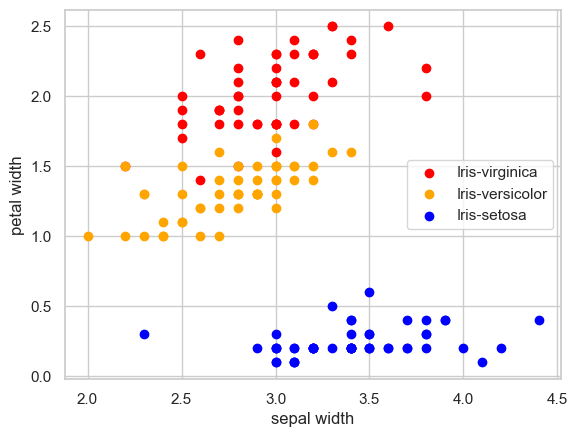

In [74]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=colors[i],label=species[i])
    plt.xlabel("sepal width")
    plt.ylabel("petal width")
    plt.legend()

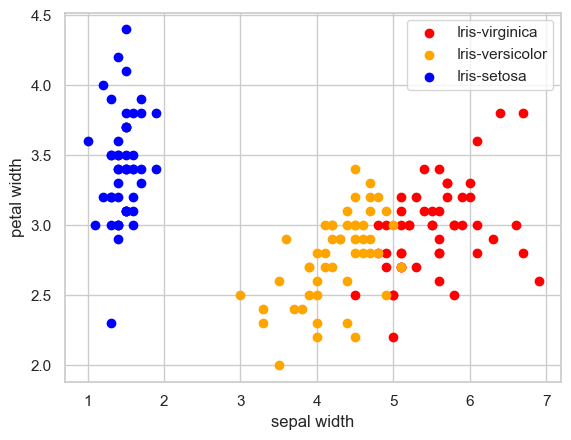

In [75]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'],x['SepalWidthCm'], c=colors[i],label=species[i])
    plt.xlabel("sepal width")
    plt.ylabel("petal width")
    plt.legend()

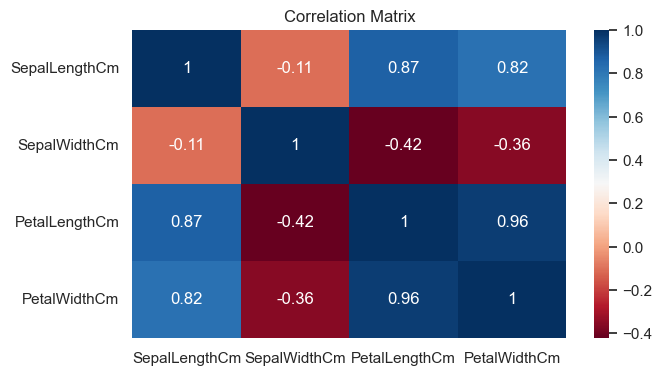

In [76]:
plt.figure(figsize=(7,4))
sns.set(style="whitegrid")
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True,cmap='RdBu')
plt.title("Correlation Matrix")
plt.show()

Lable Encoder

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [79]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y= df['Species']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.30)

In [80]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [81]:
model.fit(x_train, y_train)

LogisticRegression()

In [82]:
logistic_accuracy=model.score(x_test,y_test)*100
print("Accuracy: ",logistic_accuracy)

Accuracy:  93.33333333333333


In [87]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [88]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
knn_accuracy=model.score(x_test,y_test)*100
print("Accuracy: ",knn_accuracy)

Accuracy:  95.55555555555556


In [90]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [91]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
decision_accuracy=model.score(x_test,y_test)*100
print("Accuracy: ",decision_accuracy)

Accuracy:  93.33333333333333


In [93]:
svm_classifier = SVC(kernel='linear', C=1.0)

svm_classifier.fit(x_train, y_train)
print("Training completed")
y_pred = svm_classifier.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {svm_accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Training completed
Accuracy: 95.56
Confusion Matrix:
 [[18  0  0]
 [ 0 16  2]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.89      0.94        18
           2       0.82      1.00      0.90         9

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



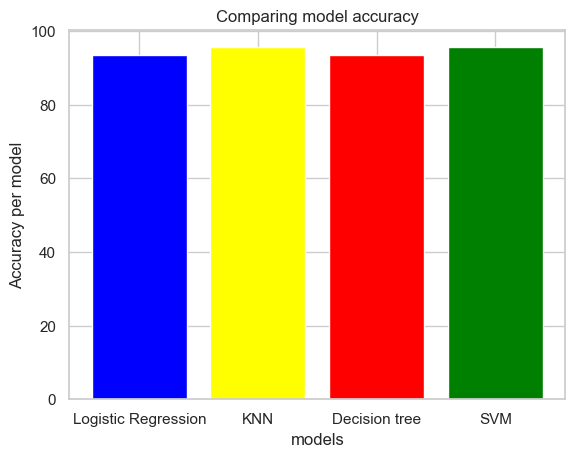

In [96]:
models=['Logistic Regression','KNN','Decision tree','SVM']
accuracy=[logistic_accuracy,knn_accuracy,decision_accuracy,svm_accuracy]
plt.bar(models,accuracy,color=['blue','yellow','red','green'])
plt.xlabel("models")
plt.ylabel("Accuracy per model")
plt.title("Comparing model accuracy")
plt.show()